In [1]:
%load_ext autoreload
%autoreload 2

In [16]:
import numpy as np
from src import renormalizable_model, utils, coarse_graining
from tqdm import tqdm
from joblib import Parallel, delayed, cpu_count
import matplotlib.pyplot as plt

In [3]:
strength_data = np.loadtxt(open("data/fg_strengths(node_num=1000)_fg_cg_consistency.csv", "rb"), delimiter=",")
out_strengths, in_strengths, ext_equities = strength_data
strengths = np.stack([out_strengths, in_strengths], axis=1)

In [4]:
num_nodes = 1000
density = np.log(num_nodes)/num_nodes
num_of_links = density*num_nodes*(num_nodes-1)

In [5]:
est_z = utils.estimate_z(strengths, num_of_links, self_loops=False, print_details=True)

      converged: True
           flag: converged
 function_calls: 48
     iterations: 46
           root: 0.014597879963673677


## FG ensemble without self-loops

In [8]:
fg_ensemble = renormalizable_model.generate_RM_ensemble(500, strengths, est_z, self_loops=False)

  0%|          | 0/500 [00:00<?, ?it/s]

100%|██████████| 500/500 [00:58<00:00,  8.57it/s]


In [9]:
z_fg = Parallel(n_jobs=cpu_count())(delayed(utils.estimate_z)(utils.compute_strengths(graph), utils.compute_num_edges(graph), self_loops=False) for graph in tqdm(fg_ensemble))

100%|██████████| 500/500 [01:21<00:00,  6.10it/s]


In [10]:
avg_z_fg = np.mean(z_fg)
print(f"Average z_fg: {avg_z_fg:.6f}")

Average z_fg: 0.014766


## Coarse graining

### Merge first 50 nodes

In [11]:
groups = coarse_graining.merge_n_group(fg_ensemble[0], 50)

In [12]:
cg_50_ensemble = Parallel(n_jobs=cpu_count())(delayed(coarse_graining.coarse_grain_weighted_graph)(graph, groups) for graph in tqdm(fg_ensemble))

  0%|          | 0/500 [00:00<?, ?it/s]

100%|██████████| 500/500 [00:12<00:00, 39.75it/s]


In [13]:
z_cg_50 = Parallel(n_jobs=cpu_count())(delayed(utils.estimate_z)(utils.compute_strengths(graph), utils.compute_num_edges(graph), self_loops=False) for graph in tqdm(cg_50_ensemble))


  0%|          | 0/500 [00:00<?, ?it/s]

100%|██████████| 500/500 [01:13<00:00,  6.80it/s]


In [14]:
avg_z_cg_50 = np.mean(z_cg_50)
print(f"Average z_cg_50: {avg_z_cg_50:.6f}")

Average z_cg_50: 0.014766


Text(0.5, 1.0, '50 nodes merged')

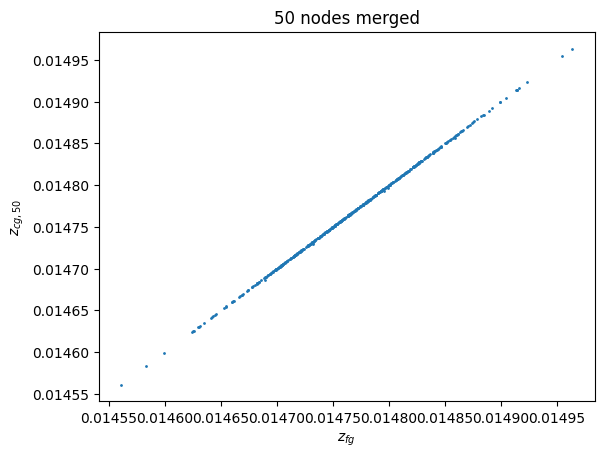

In [17]:
# Plot z_fg vs z_cg_50
plt.scatter(z_fg, z_cg_50, s=1)
plt.xlabel(r"$z_{fg}$")
plt.ylabel(r"$z_{cg,50}$")
plt.title("50 nodes merged")


### Merge first 200 nodes

In [18]:
groups_200 = coarse_graining.merge_n_group(fg_ensemble[0], 200)

In [19]:
cg_200_ensemble = Parallel(n_jobs=cpu_count())(delayed(coarse_graining.coarse_grain_weighted_graph)(graph, groups_200) for graph in tqdm(fg_ensemble))

100%|██████████| 500/500 [00:12<00:00, 40.35it/s]


In [20]:
z_cg_200 = Parallel(n_jobs=cpu_count())(delayed(utils.estimate_z)(utils.compute_strengths(graph), utils.compute_num_edges(graph), self_loops=False) for graph in tqdm(cg_200_ensemble))

100%|██████████| 500/500 [00:52<00:00,  9.53it/s]


In [21]:
avg_z_cg_200 = np.mean(z_cg_200)
print(f"Average z_cg_200: {avg_z_cg_200:.6f}")

Average z_cg_200: 0.014765


Text(0.5, 1.0, '200 nodes merged')

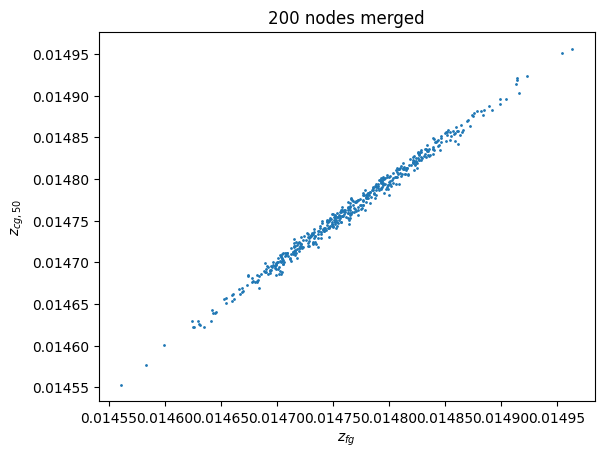

In [23]:
# Plot z_fg vs z_cg_50
plt.scatter(z_fg, z_cg_200, s=1)
plt.xlabel(r"$z_{fg}$")
plt.ylabel(r"$z_{cg,200}$")
plt.title("200 nodes merged")


### Merge first 500 nodes

In [24]:
groups_500 = coarse_graining.merge_n_group(fg_ensemble[0], 500)

In [25]:
cg_500_ensemble = Parallel(n_jobs=cpu_count())(delayed(coarse_graining.coarse_grain_weighted_graph)(graph, groups_500) for graph in tqdm(fg_ensemble))

100%|██████████| 500/500 [00:10<00:00, 46.92it/s]


In [26]:
z_cg_500 = Parallel(n_jobs=cpu_count())(delayed(utils.estimate_z)(utils.compute_strengths(graph), utils.compute_num_edges(graph), self_loops=False) for graph in tqdm(cg_500_ensemble))

100%|██████████| 500/500 [00:20<00:00, 24.64it/s]


In [27]:
avg_z_cg_500 = np.mean(z_cg_500)
print(f"Average z_cg_200: {avg_z_cg_500:.6f}")

Average z_cg_200: 0.014752


Text(0.5, 1.0, '500 nodes merged')

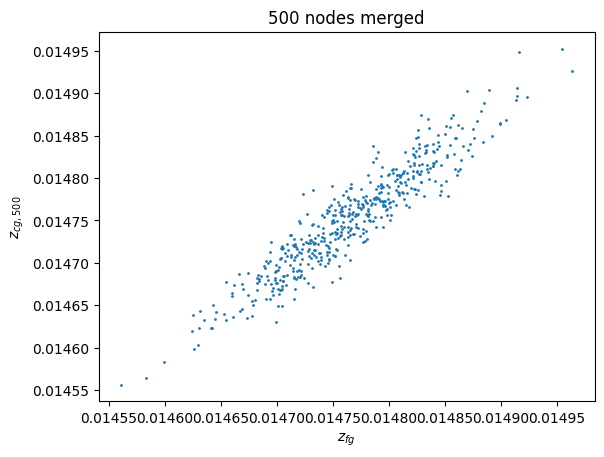

In [28]:
# Plot z_fg vs z_cg_50
plt.scatter(z_fg, z_cg_500, s=1)
plt.xlabel(r"$z_{fg}$")
plt.ylabel(r"$z_{cg,500}$")
plt.title("500 nodes merged")
